In [1]:
from matplotlib import pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
evt_x = np.loadtxt("data/fit-data-2.txt")

In [3]:
evt_x.max()

np.float64(149.7298077995585)

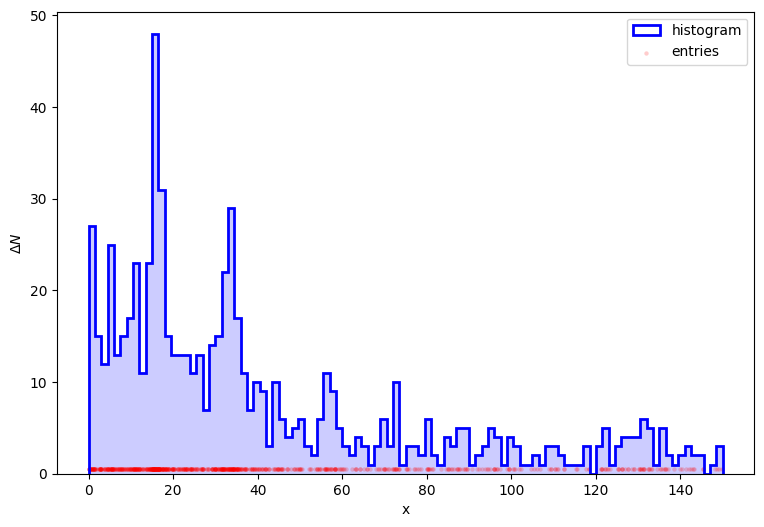

In [4]:
fig, ax = plt.subplots(figsize=(9, 6))
n_bins = 100
x_range = (0, 150)
data_y, bins, patches = ax.hist(evt_x, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=2, label='histogram')
ax.hist(evt_x, n_bins, range=x_range, density=False, color='b', alpha=0.2)
ax.scatter(evt_x, np.full_like(evt_x, 0.5), marker='o', color='r', s=10, alpha=0.2, linewidth=0, label='entries')
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.legend()
plt.show()

In [5]:
#bins

In [7]:
data_x = (bins + (bins[1] - bins[0])/2)[:-1]
#print(data_x)
delta_x = bins[1] - bins[0]
print("𝚫x = {:.2f}".format(delta_x))

𝚫x = 1.50


In [8]:
data_yerr = np.sqrt(data_y)
#print(data_y)
#print(data_yerr)

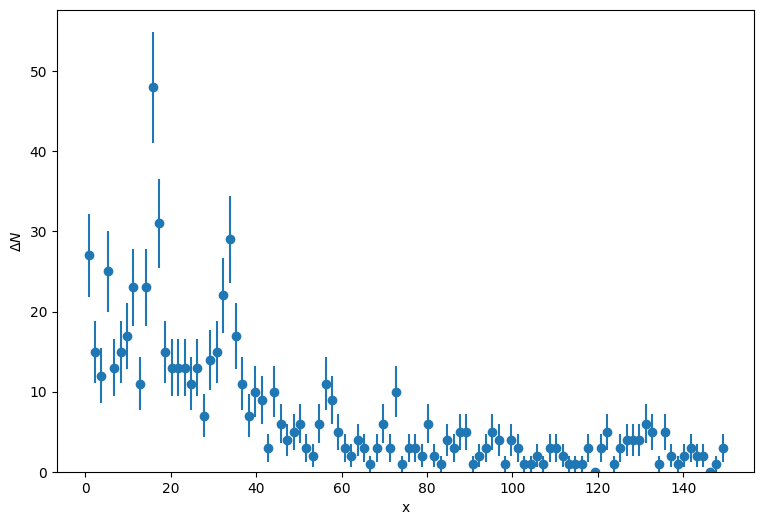

In [9]:
plt.figure(figsize=(9, 6))
plt.errorbar(data_x, data_y, data_yerr, fmt="o")
plt.xlabel('x')
plt.ylabel('$\Delta N$')
plt.ylim(0)
plt.show()

In [18]:
def bkg_pdf(x, l):
    return np.exp(- x / l) / l
def sig_pdf(x, mu, sigma):
    return np.exp(-((x - mu)/sigma)**2 / 2) / math.sqrt(2 * math.pi * sigma**2)
def bkg_model(x, b, l, c):
    return b * bkg_pdf(x, l) + c
def sig_model(x, s, mu, sigma):
    return s * sig_pdf(x, mu, sigma)
def fit_model(x, b, l, c, s1, mu1, sigma1, s2, mu2, sigma2):
    return bkg_model(x, b, l, c) + sig_model(x, s1, mu1, sigma1) + sig_model(x, s2, mu2, sigma2)

In [21]:
least_squares_mode = LeastSquares(data_x[data_y > 0], data_y[data_y > 0], data_yerr[data_y > 0], fit_model)
m = Minuit(least_squares_mode, 250, 10, 0, 60, 10, 1.5, 60, 35, 1.0,
           name=("B", "$\lambda$", "c", "S1", "$\mu_1$", "$\sigma_1$", "S2", "$\mu_2$", "$\sigma_2$"))
#m.fixed["$\sigma_2$"]=True
#m.fixed["S2"]=True

In [22]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 93.69 (χ²/ndof = 1.1)      │              Nfcn = 604              │
│ EDM = 5.62e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ B    │    510    │    50     │            │            │         │         │       │
│ 1 │ 𝜆    │   26.3    │    3.0    │            │            │         │         │       │
│ 2 │ c    │   1.54    │   0.28    │            │            │         │         │       │
│ 3 │ S1   │    101    │    17     │            │            │         │         │       │
│ 4 │ 𝜇₁   │   16.05   │   0.21    │            │            │         │         │       │
│ 5 │ 𝜎₁   │   1.11    │   0.19    │            │            │         │         │       │
│ 6 │ S2   │    96     │    18     │            │            │         │         │       │
│ 7 │ 𝜇₂   │   33.3    │    0.4    │            │            │         │         │       │
│ 8 │ 𝜎₂   │    2.1    │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬──────────────────────────────────────────────────────────────────────────────────┐
│    │        B        𝜆        c       S1       𝜇₁       𝜎₁       S2       𝜇₂       𝜎₂ │
├────┼──────────────────────────────────────────────────────────────────────────────────┤
│  B │ 2.85e+03      105   -10.26  -0.20e3    -0.25    -1.73  -0.32e3     0.93    -6.89 │
│  𝜆 │      105     9.14    -0.59       -1    -0.02    -0.01      -13     0.01    -0.27 │
│  c │   -10.26    -0.59   0.0762     0.26     0.00     0.00     0.81    -0.00     0.02 │
│ S1 │  -0.20e3       -1     0.26      287     0.07     1.18   0.02e3    -0.10     0.51 │
│ 𝜇₁ │    -0.25    -0.02     0.00     0.07   0.0423     0.01     0.03    -0.00     0.00 │
│ 𝜎₁ │    -1.73    -0.01     0.00     1.18     0.01   0.0371     0.21    -0.00     0.00 │
│ S2 │  -0.32e3      -13     0.81   0.02e3     0.03     0.21      316    -0.57     3.71 │
│ 𝜇₂ │     0.93     0.01    -0.00    -0.10    -0.00    -0.00    -0.57    0.158    -0.03 │
│ 𝜎₂ │    -6.89    -0.27     0.02     0.51     0.00     0.00     3.71    -0.03    0.215 │
└────┴──────────────────────────────────────────────────────────────────────────────────┘

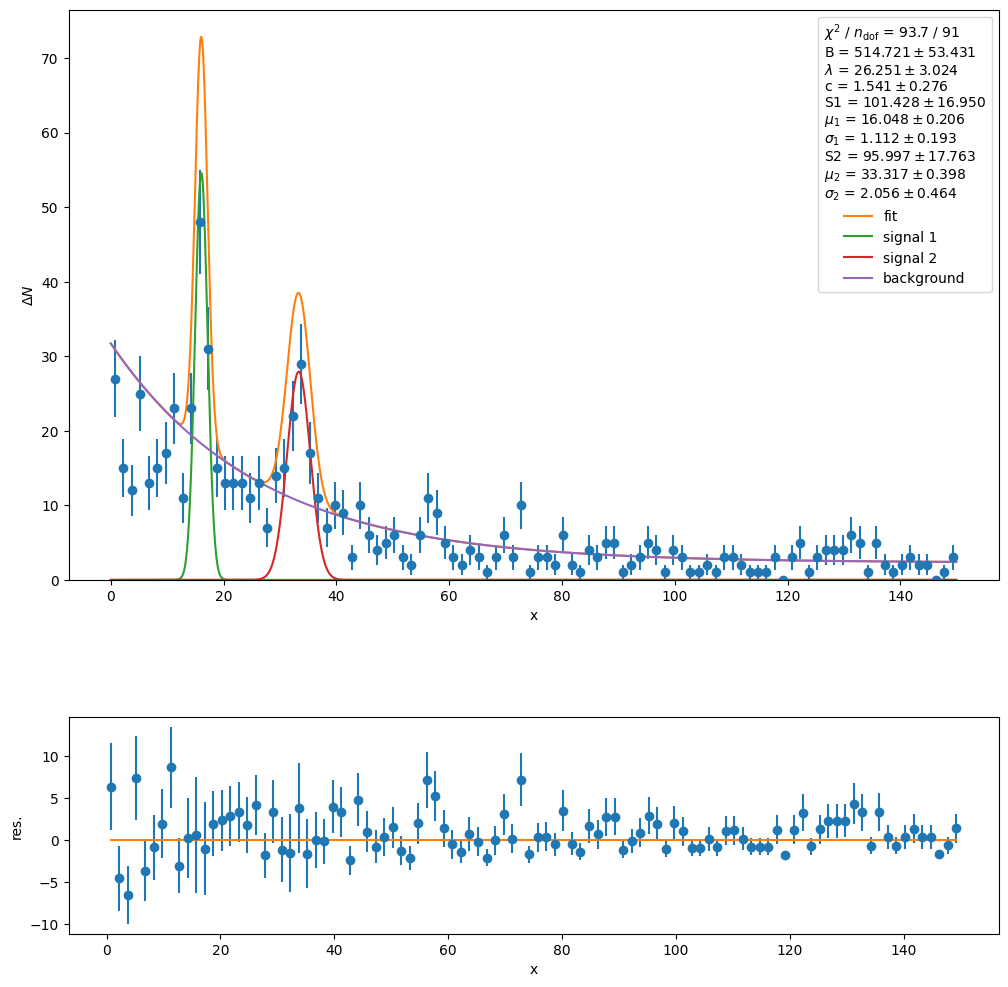

In [23]:
import matplotlib.gridspec as gridspec
data_x_f = np.arange(0, bins[-1], 0.1)
data_y_f = fit_model(data_x_f, *m.values)*delta_x
bkg_y_f = bkg_model(data_x_f, *m.values[0:3])*delta_x
sig1_y_f = sig_model(data_x_f, *m.values[3:6])*delta_x
sig2_y_f = sig_model(data_x_f, *m.values[6:])*delta_x

plt.figure(figsize=(12, 12))
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o")
ax0.plot(data_x_f, data_y_f, label="fit")
ax0.plot(data_x_f, sig1_y_f, label="signal 1")
ax0.plot(data_x_f, sig2_y_f, label="signal 2")
ax0.plot(data_x_f, bkg_y_f, label="background")
ax.legend()
ax0.set_xlabel('x')
ax0.set_ylabel('$\Delta N$')
ax1.errorbar(data_x, (data_y-fit_model(data_x, *m.values)), data_yerr, fmt="o")
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel('x')
ax1.set_ylabel('res.')
ax0.set_ylim(0)

fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
ax0.legend(title="\n".join(fit_info))
plt.show()
plt.show()